### ANN - artificial neural network (SGD and Adam optimizers)

In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers, optimizers

Using TensorFlow backend.


In [0]:
df = pd.read_csv('./drive/My Drive/Colab Notebooks/csci3202/train.csv')
X = df.iloc[:, 1:-2]
y = df.iloc[:, -1]
#print(X)
print(y[0:5])

0    0
1    0
2    0
3    1
4    1
Name: STENT, dtype: int64


In [0]:
#change y to hot encoding  nostent = [1, 0], stent = [0, 1]
#y0 = tf.keras.utils.to_categorical(y, 2)
#y0[0:5,:]

In [0]:
minmaxScaler = preprocessing.MinMaxScaler()  #the default is: feature_range=(0,1) 
Xs = minmaxScaler.fit_transform(X)
#x_tr, x_tst, y_tr, y_tst = train_test_split(Xs, y0, test_size = 0.10)
x_tr, x_tst, y_tr, y_tst = train_test_split(Xs, y, test_size = 0.10)

In [0]:
y_tst

788    0
22     0
450    0
149    1
237    0
      ..
364    0
629    1
394    0
854    0
784    1
Name: STENT, Length: 100, dtype: int64

In [0]:
print(x_tr.shape)
print(y_tr.shape)
print(x_tst.shape)
print(y_tst.shape)

(897, 111)
(897,)
(100, 111)
(100,)


## Define NN model

In [0]:
def buildmodel():
    name = tf.keras.Sequential()
        #seqmodel.add(tf.keras.layers.Dense(64, activation = 'sigmoid', input_shape = (Xs.shape[1], ),kernel_regularizer=regularizers.l2(0.01) ))
    name.add(tf.keras.layers.Dense(64, activation = 'sigmoid', input_shape = (Xs.shape[1], ) ))
    name.add(tf.keras.layers.BatchNormalization())
        #seqmodel.add(tf.keras.layers.Dropout(0.5))
    name.add(tf.keras.layers.Dense(32, activation='sigmoid'))
        #seqmodel.add(tf.keras.layers.Dense(32, activation='relu'))
        #seqmodel.add(tf.keras.layers.Dropout(0.5))
        #seqmodel.add(tf.keras.layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
    name.add(tf.keras.layers.BatchNormalization())
        #seqmodel.add(tf.keras.layers.Dense(2, activation = 'softmax'))
    name.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    return name

In [0]:
model = buildmodel()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 64)                7168      
_________________________________________________________________
batch_normalization_32 (Batc (None, 64)                256       
_________________________________________________________________
dense_49 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_33 (Batc (None, 32)                128       
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 33        
Total params: 9,665
Trainable params: 9,473
Non-trainable params: 192
_________________________________________________________________


## SGD optimizer

In [0]:
# SGD - iterate thru learning rate

histDict_sgd = {}
learnRate_sgd = [.0001, .0005, .001, .005, .01, .05]
for i in learnRate_sgd:
    seqmodel_sgd = buildmodel()
    opt = tf.keras.optimizers.SGD(learning_rate = i, momentum = 0.0, nesterov=True)
    seqmodel_sgd.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    hist_sgd = seqmodel_sgd.fit(x_tr, y_tr, epochs=300, validation_data=(x_tst, y_tst))
   
    histDict_sgd[i] = hist_sgd.history['val_loss']



Epoch 1/300
29/29 [==============================] - 0s 10ms/step - loss: 0.8108 - accuracy: 0.5184 - val_loss: 0.7698 - val_accuracy: 0.3200
Epoch 2/300
29/29 [==============================] - 0s 4ms/step - loss: 0.8158 - accuracy: 0.5162 - val_loss: 0.7684 - val_accuracy: 0.3200
Epoch 3/300
29/29 [==============================] - 0s 4ms/step - loss: 0.8070 - accuracy: 0.5240 - val_loss: 0.7666 - val_accuracy: 0.3200
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 0.7974 - accuracy: 0.5162 - val_loss: 0.7645 - val_accuracy: 0.3200
Epoch 5/300
29/29 [==============================] - 0s 4ms/step - loss: 0.7898 - accuracy: 0.5206 - val_loss: 0.7623 - val_accuracy: 0.3200
Epoch 6/300
29/29 [==============================] - 0s 4ms/step - loss: 0.7888 - accuracy: 0.5295 - val_loss: 0.7597 - val_accuracy: 0.3200
Epoch 7/300
29/29 [==============================] - 0s 4ms/step - loss: 0.7890 - accuracy: 0.5229 - val_loss: 0.7568 - val_accuracy: 0.3200
Epoch 8/300


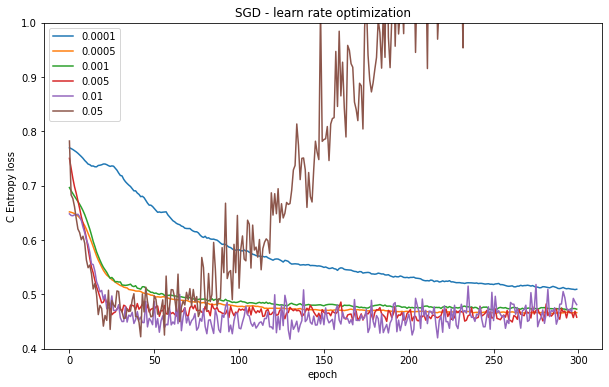

In [0]:
plt.figure(figsize=(10,6))
plt.xlabel('epoch')
plt.ylabel('C Entropy loss')
plt.title('SGD - learn rate optimization')
plt.ylim(0.4, 1.0)
for i in learnRate_sgd:
    plt.plot(histDict_sgd[i], label=i)
plt.legend(loc='upper left')
plt.savefig('./drive/My Drive/SGD_lrates2.png')

In [0]:
seqmodel_sgd001 = buildmodel()
opt = tf.keras.optimizers.SGD(learning_rate = 0.0005, momentum = 0.0, nesterov=True)
seqmodel_sgd001.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
hist_sgd001 = seqmodel_sgd001.fit(x_tr, y_tr, epochs = 300, validation_data=(x_tst, y_tst))

Epoch 1/300
29/29 [==============================] - 0s 7ms/step - loss: 0.7537 - accuracy: 0.5006 - val_loss: 0.7092 - val_accuracy: 0.3200
Epoch 2/300
29/29 [==============================] - 0s 4ms/step - loss: 0.7275 - accuracy: 0.5329 - val_loss: 0.7074 - val_accuracy: 0.3200
Epoch 3/300
29/29 [==============================] - 0s 4ms/step - loss: 0.7120 - accuracy: 0.5407 - val_loss: 0.7048 - val_accuracy: 0.3200
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6968 - accuracy: 0.5429 - val_loss: 0.7015 - val_accuracy: 0.3400
Epoch 5/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5708 - val_loss: 0.6975 - val_accuracy: 0.3700
Epoch 6/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6741 - accuracy: 0.5741 - val_loss: 0.6926 - val_accuracy: 0.4200
Epoch 7/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6589 - accuracy: 0.5931 - val_loss: 0.6865 - val_accuracy: 0.5200
Epoch 8/300
2

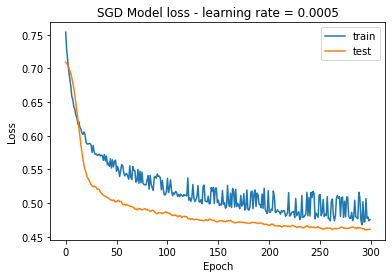

In [0]:

plt.plot(hist_sgd001.history['loss'])
plt.plot(hist_sgd001.history['val_loss'])
plt.title('SGD Model loss - learning rate = 0.0005')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')

In [0]:
from sklearn.metrics import recall_score, precision_score, f1_score
yhat = seqmodel_sgd001.predict_classes(x_tst)
recall_sgd = recall_score(y_tst, yhat.reshape(len(yhat)))
precision_sgd = precision_score(y_tst, yhat.reshape(len(yhat)))
fscore_sgd = f1_score(y_tst, yhat.reshape(len(yhat)))
print('recall = ', recall_sgd)
print('precision = ', precision_sgd)
print('fscore = ', fscore_sgd)

recall =  0.5625
precision =  0.6666666666666666
fscore =  0.6101694915254238


## Adam optimizer

In [0]:
#Adam - iterate thru learning rate

histDict_adam = {}
learnRate_adam = [.00001,0.00005, .0001, .001]
for i in learnRate_adam:
    seqmodel = buildmodel()
    opt = tf.keras.optimizers.Adam(learning_rate= i, beta_1=0.9, beta_2=0.999, amsgrad=False)
    #opt = tf.keras.optimizers.SGD(learning_rate = i, momentum = 0.0, nesterov=False)
    seqmodel.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    history = seqmodel.fit(x_tr, y_tr, epochs=200, validation_data=(x_tst, y_tst))
    histDict_adam[i] = history.history['val_loss']



Epoch 1/200
29/29 [==============================] - 0s 7ms/step - loss: 0.8126 - accuracy: 0.5485 - val_loss: 0.7016 - val_accuracy: 0.6800
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 0.7901 - accuracy: 0.5518 - val_loss: 0.6781 - val_accuracy: 0.6800
Epoch 3/200
29/29 [==============================] - 0s 4ms/step - loss: 0.7733 - accuracy: 0.5608 - val_loss: 0.6639 - val_accuracy: 0.6800
Epoch 4/200
29/29 [==============================] - 0s 4ms/step - loss: 0.7545 - accuracy: 0.5831 - val_loss: 0.6564 - val_accuracy: 0.6800
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 0.7488 - accuracy: 0.5831 - val_loss: 0.6537 - val_accuracy: 0.6800
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 0.7263 - accuracy: 0.6098 - val_loss: 0.6541 - val_accuracy: 0.6800
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 0.7186 - accuracy: 0.6176 - val_loss: 0.6561 - val_accuracy: 0.6900
Epoch 8/200
2

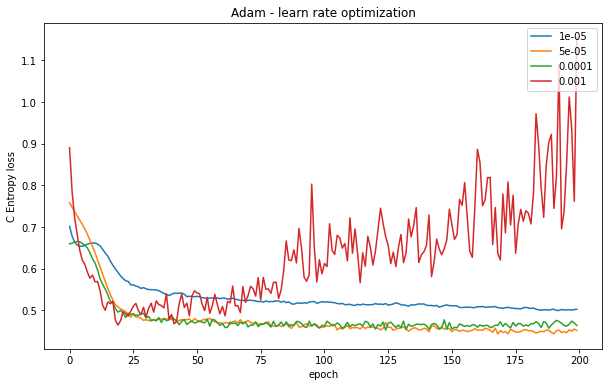

In [0]:
plt.figure(figsize=(10,6))
plt.xlabel('epoch')
plt.ylabel('C Entropy loss')
plt.title('Adam - learn rate optimization')
for i in learnRate_adam:
    plt.plot(histDict_adam[i], label=i)

plt.legend(loc='upper right')
plt.savefig('./drive/My Drive/adam_lrates.png')

In [0]:
seqmodel_adam = buildmodel()
opt = tf.keras.optimizers.Adam(learning_rate= 0.00005, beta_1=0.9, beta_2=0.999, amsgrad=False)   
seqmodel_adam.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
hist_adam = seqmodel_adam.fit(x_tr, y_tr, epochs=300, validation_data=(x_tst, y_tst))

Epoch 1/300
29/29 [==============================] - 0s 7ms/step - loss: 0.7728 - accuracy: 0.5630 - val_loss: 0.6918 - val_accuracy: 0.6300
Epoch 2/300
29/29 [==============================] - 0s 12ms/step - loss: 0.7095 - accuracy: 0.5886 - val_loss: 0.6876 - val_accuracy: 0.7000
Epoch 3/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6755 - accuracy: 0.6265 - val_loss: 0.6832 - val_accuracy: 0.7300
Epoch 4/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6558 - accuracy: 0.6343 - val_loss: 0.6791 - val_accuracy: 0.7400
Epoch 5/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6395 - accuracy: 0.6533 - val_loss: 0.6750 - val_accuracy: 0.7400
Epoch 6/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.6555 - val_loss: 0.6691 - val_accuracy: 0.7400
Epoch 7/300
29/29 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.6678 - val_loss: 0.6635 - val_accuracy: 0.7500
Epoch 8/300


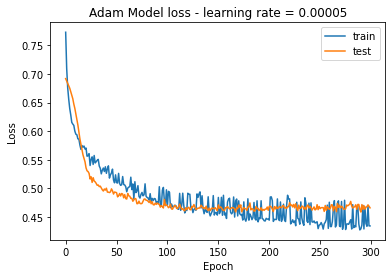

In [0]:

plt.plot(hist_adam.history['loss'])
plt.plot(hist_adam.history['val_loss'])
plt.title('Adam Model loss - learning rate = 0.00005')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')

In [0]:

from sklearn.metrics import recall_score, precision_score, f1_score
yhat_adam = seqmodel_adam.predict_classes(x_tst)
yhat_adam = yhat_adam.reshape(len(yhat_adam))
recall_adam = recall_score(y_tst, yhat_adam)
precision_adam = precision_score(y_tst, yhat_adam)
fscore_adam = f1_score(y_tst, yhat_adam)
print('recall = ', recall_adam)
print('precision = ', precision_adam)
print('fscore = ', fscore_adam)

recall =  0.5
precision =  0.6956521739130435
fscore =  0.5818181818181818


In [0]:
yhat.reshape(len(yhat)).shape

(100,)

In [0]:
prob = seqmodel_sgd001.predict(x_tst)

In [0]:
prob[:5]

array([[0.2635943 ],
       [0.08774957],
       [0.5077758 ],
       [0.6583117 ],
       [0.15086709]], dtype=float32)

(array([17., 14., 15., 12., 14., 10.,  8.,  3.,  4.,  3.]),
 array([0.00287095, 0.0978077 , 0.19274446, 0.28768122, 0.38261798,
        0.4775547 , 0.57249147, 0.66742826, 0.762365  , 0.8573018 ,
        0.9522385 ], dtype=float32),
 <a list of 10 Patch objects>)

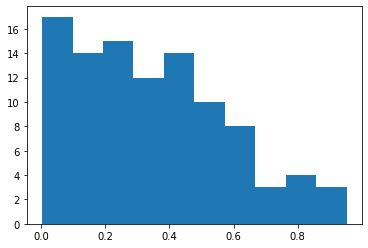

In [0]:
plt.hist(prob)

## Summary

#### The best NN design of many candidates was one of three fully connected layers.  I initally started with a deeper network but scaled back.  Layer one had 64 neurons with sigmoid activation function followed by batch normalization.  Layer two had 32 neurons with sigmoid activation, again followed by batch normalization.  Layer three was the output layer and consisted of a single sigmoid neuron.  The batch normalizations were helpful preventing vanishing or exploding gradients especially with deep networks associated with sigmoid activation functions.  Simple experimentation demonstrated this.  Deeper models were investigated but didn’t seem to outperform the more shallow networks so I concentrated on optimizing the smaller network.  The optimization hyperparameters I focused on were learning rate, optimizer method, and epoch.  The optimizer candidates were SGD and Adam.  In the SGD optimizer momentum was set to 0.0 but Nestrov was set to True.  Experimentation with setting momentum was a bit tricky.  Depending on the value, during convergence, loss would oscillate between values, not settling after many epochs.  To keep things simple momentum was set to zero but Nestrov was set to True.  All input data was scaled to be between 0 and 1 before feeding into the network.  

#### It turned out that both SGD with Adam models were almost the same for log loss and accuracy,  0.46 and 0.77, respectively.  The recall in the SGD model was slightly better than the Adam model, 0.56 versus 0.50, respectively.  But SGD’s precision was slightly worse than Adam’s model, 0.67 versus 0.70, respectively.  Overall both optimizers performed similarly.  However each model had a different preference towards learning rate.  In the SGD model the best learning rate was 5e-4 and for Adam it was  5e-5.  It could be seen that learning rates that were to high had huge oscillations.  


###create submission file -don't forget to scale data!

In [0]:
df_test = pd.read_csv('./drive/My Drive/Colab Notebooks/csci3202/test.csv')
df_test

,PID,gender,age,vessel,seg,OS_PB40,OS_PB70,OS_MLA,MLA,EEM_MLA,PB_MLA,No_PB40,No_PB70,No_lumen40_ROI,No_lumen25_ROI,No_lumen30_ROI,Sum_plaque_ROI,Sum_EEM_ROI,PB_ROI,mean_lumen_ROI,mean_plaque_ROI,mean_EEM_ROI,No_lumen40_PB40,No_lumen25_PB40,No_lumen30_PB40,Sum_plaque_PB40,Sum_EEM_PB40,PB_PB40,mean_lumen_PB40,mean_plaque_PB40,mean_EEM_PB40,No_lumen40_PB70,No_lumen25_PB70,No_lumen30_PB70,Sum_plaque_PB70,Sum_EEM_PB70,PB_PB70,mean_lumen_PB70,mean_plaque_PB70,mean_EEM_PB70,...,Sum_EEM_prox5,PB_prox5,mean_lumen_prox5,mean_plaque_prox5,mean_EEM_prox5,max_EEM_prox5,No_lumen40_dist5,No_lumen25_dist5,No_lumen30_dist5,Sum_plaque_dist5,Sum_EEM_dist5,PB_dist5,mean_lumen_dist5,mean_plaque_dist5,mean_EEM_dist5,max_EEM_dist5,mean_lumen_aver,mean_EEM_aver,area1_stenosis_aver,area1_stenosis_prox5,area1_stenosis_dist5,area2_stenosis_aver,area2_stenosis_prox5,area2_stenosis_dist5,area3_stenosis_aver,area3_stenosis_prox5,area3_stenosis_dist5,area4_stenosis_aver,area4_stenosis_prox5,area4_stenosis_dist5,RI_MLA_ref,RI_MLA_prox5,RI_worst_ref,RI_worst_prox5,variance_lumen_worst,variance_lumen_PB40,variance_plaque_worst,variance_plaque_PB40,long_eccentricity_worst,long_eccentricity_PB40
0,199,2,75,1,1,0,0,962,3.473086,12.661064,0.725688,1357,38,81,0,0,11765.90951,23326.82395,0.504394,5.828427,6.572861,12.401289,81,0,0,10202.140110,18612.65157,0.548129,5.773362,7.942667,13.716029,38,0,0,256.267623,475.836993,0.538562,3.569957,8.952069,12.522026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,879.221214,2629.740603,0.334338,5.835065,2.930737,8.765802,9.735528,2.917532,0.000000,-0.190419,0.000000,0.404790,0.000000,0.000000,0.603791,-0.459612,0.000000,0.270194,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.221613,12.307502,0.724321,2.497268,0.079745,0.511430
1,1139,1,53,1,3,2547,0,3607,4.447922,9.701345,0.541515,902,0,0,0,0,24413.18230,68426.22536,0.356781,10.012008,5.867830,15.879839,0,0,0,4288.157707,11450.79439,0.374486,7.025151,5.669743,12.694894,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4778.206644,0.361642,10.167347,5.760008,15.927355,18.444821,0,0,0,1195.063720,3780.239493,0.316134,8.617253,3.983546,12.600798,13.363465,9.392300,14.264077,0.526429,0.562529,0.483835,0.688173,0.720737,0.647013,0.304069,0.357119,0.241476,0.541758,0.589612,0.589612,0.680124,0.609100,0.749141,0.670909,1.440733,3.362238,0.322119,2.599126,0.034811,0.245997
2,1255,1,70,1,1,328,0,1119,3.229948,8.087537,0.600627,2295,71,336,0,0,21640.19372,46100.20275,0.469416,7.643699,6.949591,14.593290,336,0,0,16408.348540,31579.05598,0.519596,6.362600,7.397338,13.759937,71,0,0,572.874129,865.745477,0.661712,3.469146,8.724452,12.193598,...,6538.442415,0.345488,14.264956,7.529852,21.794808,22.795558,0,0,0,1208.403452,3476.179948,0.347624,7.739852,4.124244,11.864095,12.412587,11.002404,16.829452,0.706433,0.773575,0.582686,0.808078,0.851802,0.727754,0.507805,0.620376,0.300332,0.678223,0.751531,0.751531,0.480559,0.371076,0.674779,0.521049,2.130560,9.388924,1.705015,2.378571,0.047483,0.250396
3,964,1,76,1,2,82,0,3289,4.752585,10.469180,0.546040,2042,0,0,0,0,15145.14259,44714.81695,0.338705,7.656276,5.576875,13.233151,0,0,0,9347.158048,25795.67202,0.362354,6.516140,6.116412,12.632552,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1538.576340,0.376414,11.700417,7.062709,18.763126,23.691102,0,0,0,61.913196,172.774989,0.358346,5.279133,2.948247,8.227380,8.453824,8.489775,13.495253,0.440199,0.593811,0.099741,0.647833,0.746706,0.422345,0.368217,0.541581,-0.016018,0.602550,0.714137,0.714137,0.775768,0.557966,0.734090,0.527990,0.237074,5.869653,0.678124,2.671717,0.044392,0.949097
4,1337,1,69,1,1,0,2470,3678,1.895591,5.568812,0.659606,2967,258,1715,582,1160,18205.05690,43245.40481,0.420971,5.741281,5.037733,10.779014,1690,582,1160,13094.653340,29358.53653,0.446025,4.566877,5.328147,9.895024,258,237,258,757.201898,2354.212734,0.321637,2.261137,6.863718,9.124856,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0.000000,0.

In [0]:
#scale data 0-1
testdata = np.array(df_test.iloc[:, 1:])
minmaxScaler = preprocessing.MinMaxScaler()  #the default is: feature_range=(0,1) 
Xscaled = minmaxScaler.fit_transform(testdata)

In [0]:
Xscaled.shape

(450, 111)

In [0]:
testprob = seqmodel_sgd001.predict(Xscaled)
testprob[:10]  #need to reshape to vector

array([[0.10220828],
       [0.02145065],
       [0.17652181],
       [0.02077233],
       [0.65396595],
       [0.842497  ],
       [0.27097678],
       [0.39340943],
       [0.3670723 ],
       [0.0226861 ]], dtype=float32)

In [0]:
df_submit = pd.DataFrame({'PID': df_test['PID'], 'STENT': testprob.reshape(len(testprob))})
df_submit.iloc[:100,:]

,PID,STENT
0,199,0.102208
1,1139,0.021451
2,1255,0.176522
3,964,0.020772
4,1337,0.653966
...,...,...
95,228,0.146886
96,1287,0.190238
97,435,0.758618
98,128,0.470143


In [0]:
df_submit.to_csv('./drive/My Drive/Colab Notebooks/csci3202/submit_sgd001.csv', index=False)

(array([109.,  87.,  65.,  47.,  37.,  28.,  23.,  22.,  14.,  18.]),
 array([0.00502635, 0.10271259, 0.20039882, 0.29808506, 0.3957713 ,
        0.49345753, 0.5911438 , 0.68883   , 0.78651625, 0.8842025 ,
        0.9818887 ], dtype=float32),
 <a list of 10 Patch objects>)

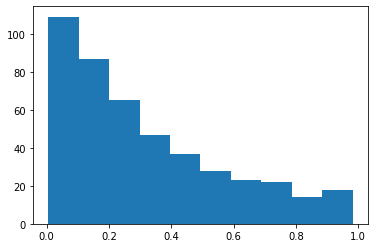

In [0]:
plt.hist(testprob)